In [99]:
%load_ext autoreload
#Now you can turn on auto-reloading
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab_Notebooks/cs3220_A1_task"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import sys
sys.path.append(path)

In [102]:
import json
import io
import os
from actor_class import Actor
from actorGraph_class import ActorGraph

In [103]:
# Locate all the JSON files inside the main Directory and any sub-Folder:
json_files = [os.path.join(root, name)
    for root, dirs, files in os.walk(path)
    for name in files
    if name.endswith((".json"))]

# Load files
with open(json_files[0]) as f:
    json_data = json.load(f)

In [104]:
data_actors=[]

for show in json_data[:10]:
    for actor in show['cast']:
        data_actor = {}
        data_actor['id'] = actor['person']['id']
        data_actor['name'] = actor['person']['name']
        data_actor['birthday'] = actor['person']['birthday']
        data_actor['charName'] = actor['character']['name']
        data_actor['showName'] = show['name']
        data_actor['showId'] = show['id']
        data_actors.append(data_actor)
        print(data_actor)

{'id': 27410, 'name': 'Lena Dunham', 'birthday': '1986-05-13', 'charName': 'Hannah Horvath', 'showName': 'Girls', 'showId': 139}
{'id': 11102, 'name': 'Allison Williams', 'birthday': '1988-04-13', 'charName': 'Marnie Michaels', 'showName': 'Girls', 'showId': 139}
{'id': 27411, 'name': 'Jemima Kirke', 'birthday': '1985-04-26', 'charName': 'Jessa Johansson', 'showName': 'Girls', 'showId': 139}
{'id': 16405, 'name': 'Zosia Mamet', 'birthday': '1988-02-02', 'charName': 'Shoshanna Shapiro', 'showName': 'Girls', 'showId': 139}
{'id': 24858, 'name': 'Adam Driver', 'birthday': '1983-11-19', 'charName': 'Adam Sackler', 'showName': 'Girls', 'showId': 139}
{'id': 24970, 'name': 'Alex Karpovsky', 'birthday': '1975-09-23', 'charName': 'Ray Ploshansky', 'showName': 'Girls', 'showId': 139}
{'id': 27412, 'name': 'Andrew Rannells', 'birthday': '1978-08-23', 'charName': 'Elijah Krantz', 'showName': 'Girls', 'showId': 139}
{'id': 4896, 'name': 'Ebon Moss-Bachrach', 'birthday': '1977-03-19', 'charName': '

In [105]:
my_actors = set()
for data_actor in data_actors:
    my_actor = Actor(data_actor['id'], data_actor['name'],
                     data_actor['birthday'], data_actor['charName'])
    my_actors.add(my_actor)

for data_actor in data_actors:
    for my_actor in my_actors:
        if my_actor.id == data_actor['id']:
            my_actor.append({data_actor['showId']: data_actor['showName']})

actorGraph = ActorGraph(my_actors)
actorGraph.buildRelations()

In [106]:
for actor in actorGraph:
    print(actor)
    actor.printRelations()


The actor Ariel Martin(194646) is in shows: [{"32087": "Chicken Girls"}]
with actor 126270: 1
with actor 11942: 1
with actor 160113: 1
with actor 142915: 1
with actor 188815: 1
with actor 193919: 1
with actor 192890: 1
with actor 199489: 1
with actor 188808: 1
with actor 207647: 1
with actor 212031: 1
with actor 207649: 1
with actor 193914: 1
with actor 190805: 1
with actor 190901: 1
with actor 188814: 1
with actor 220186: 1
with actor 167897: 1
with actor 214636: 1
with actor 190229: 1
with actor 207646: 1
with actor 188816: 1
with actor 207648: 1
with actor 212782: 1
with actor 207650: 1
with actor 193915: 1
with actor 191010: 1
with actor 189515: 1
with actor 190902: 1
with actor 190806: 1
The actor Dylan Llewellyn(193032) is in shows: [{"33320": "Derry Girls"}]
with actor 39476: 1
with actor 39462: 1
with actor 103876: 1
with actor 14138: 1
with actor 128468: 1
with actor 65512: 1
with actor 96920: 1
with actor 193031: 1
with actor 59413: 1
with actor 72647: 1
with actor 193030: 1


In [107]:
visualisationData={}
legendData=[]
for actor in actorGraph:
  print(actor)
  print(f"Strength: {actor.getStrength()}")
  visualisationData[actor._id]=actor.getStrength()
  legendData.append(actor.name)

The actor Ariel Martin(194646) is in shows: [{"32087": "Chicken Girls"}]
Strength: 30
The actor Dylan Llewellyn(193032) is in shows: [{"33320": "Derry Girls"}]
Strength: 11
The actor Lily Chee(126270) is in shows: [{"32087": "Chicken Girls"}]
Strength: 30
The actor Tara Lynne O'Neill(39476) is in shows: [{"33320": "Derry Girls"}]
Strength: 11
The actor Brec Bassinger(11942) is in shows: [{"32087": "Chicken Girls"}]
Strength: 30
The actor Hayden Summerall(160113) is in shows: [{"32087": "Chicken Girls"}]
Strength: 30
The actor Roger Jackson(60713) is in shows: [{"6771": "The Powerpuff Girls"}, {"1955": "The Powerpuff Girls"}]
Strength: 14
The actor Carlyn Burchell(37682) is in shows: [{"1073": "Bomb Girls"}]
Strength: 14
The actor Mae Whitman(13037) is in shows: [{"23542": "Good Girls"}]
Strength: 7
The actor Kaylyn Slevin(142915) is in shows: [{"32087": "Chicken Girls"}]
Strength: 30
The actor Betty White(11487) is in shows: [{"722": "The Golden Girls"}]
Strength: 3
The actor Manny Mon

In [108]:
visualisationData

{194646: 30,
 193032: 11,
 126270: 30,
 39476: 11,
 11942: 30,
 160113: 30,
 60713: 14,
 37682: 14,
 13037: 7,
 142915: 30,
 11487: 3,
 2017: 7,
 13110: 7,
 188815: 30,
 193919: 30,
 76464: 7,
 27412: 7,
 228271: 3,
 192890: 30,
 199489: 30,
 188808: 30,
 207647: 30,
 212031: 30,
 52468: 14,
 39462: 11,
 243: 14,
 30001: 14,
 18545: 13,
 207649: 30,
 50063: 3,
 193914: 30,
 20369: 13,
 190805: 30,
 2515: 14,
 3354: 13,
 4202: 14,
 16225: 14,
 103876: 11,
 159673: 3,
 14138: 11,
 20026: 13,
 60712: 7,
 190901: 30,
 24858: 7,
 188814: 30,
 220186: 30,
 128468: 11,
 26252: 14,
 167897: 30,
 27411: 7,
 214636: 30,
 39169: 14,
 190229: 30,
 615: 7,
 24970: 7,
 207646: 30,
 188816: 30,
 52467: 14,
 41612: 7,
 65512: 11,
 15975: 14,
 207648: 30,
 16405: 7,
 202681: 7,
 52469: 14,
 32974: 7,
 96920: 11,
 41614: 13,
 193031: 11,
 212782: 30,
 11102: 7,
 48963: 13,
 6800: 13,
 207650: 30,
 193915: 30,
 28821: 14,
 4896: 7,
 201600: 7,
 76588: 3,
 31774: 14,
 62142: 3,
 44261: 13,
 31966: 7,
 274

In [109]:
legendData

['Ariel Martin',
 'Dylan Llewellyn',
 'Lily Chee',
 "Tara Lynne O'Neill",
 'Brec Bassinger',
 'Hayden Summerall',
 'Roger Jackson',
 'Carlyn Burchell',
 'Mae Whitman',
 'Kaylyn Slevin',
 'Betty White',
 'Manny Montana',
 'Amanda Leighton',
 'Riley Lewis',
 'Carson Lueders',
 'Natalie Palamides',
 'Andrew Rannells',
 'Laci Mosley',
 'Hayley LeBlanc',
 'Grant Knoche',
 'Annie LeBlanc',
 'Talin Silva',
 'Sean Cavaliere',
 'Kate Hennig',
 'Siobhan McSweeney',
 'Kassandra Santos',
 'Lisa Norton',
 'Kelly Bishop',
 'Erin Reese DeJarnette',
 'Rue McClanahan',
 'Jenna Davis',
 'Edward Herrmann',
 'Caden Conrique',
 'Brittany Allen',
 'Jared Padalecki',
 'Jodi Balfour',
 'Charlotte Hegele',
 'Tommy Tiernan',
 'Melanie Field',
 'Ian McElhinney',
 'Milo Ventimiglia',
 'Catherine Cavadini',
 'Mads Lewis',
 'Adam Driver',
 'Dylan Conrique',
 'Rush Holland Butler',
 'Saoirse-Monica Jackson',
 'Peter Outerbridge',
 'Paul Toweh',
 'Jemima Kirke',
 'Jay Ulloa',
 'Tom Kane',
 'Aidette Cancino',
 'Tara S

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

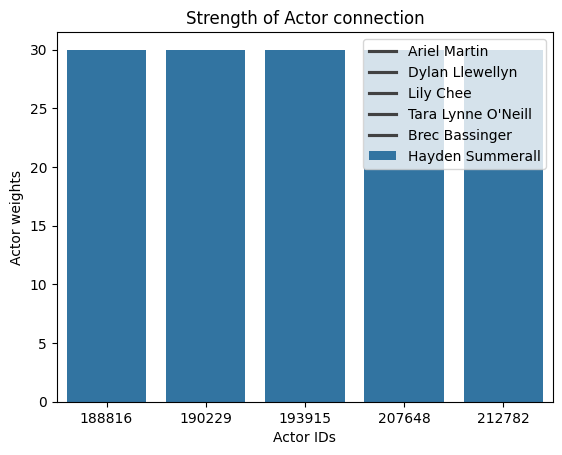

In [111]:
#Configure your x and y values from the dictionary:
x= list(visualisationData.keys())
y=list(visualisationData.values())
data= pd.DataFrame({'Actor_IDs':x,'Actor_weights':y})

#Create the graph = create seaborn barplot
ax=sns.barplot(x='Actor_IDs',y='Actor_weights', data=data.sort_values('Actor_weights').tail(5))

#specfiy axis labels
ax.legend(legendData)
ax.set(xlabel='Actor IDs',
       ylabel='Actor weights',
       title='Strength of Actor connection')

#display barplot
plt.show()

In [112]:
import networkx as nx

In [113]:
g = nx.Graph()

In [ ]:
for actor in actorGraph:
    g.add_node(actor._id, name=actor.name)
    for x, y in actor.relations.items():
        g.add_edge(actor._id, x, weight=y)

In [ ]:
weights = nx.get_edge_attributes(g,'weight').values()
weights

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
colors_dict={1:'c',2:'g',3:'r'}

In [ ]:
def get_color(weight):
  return colors_dict[weight]

In [ ]:
colors = map(get_color, list(weights))
c=list(colors)
c

['c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c'

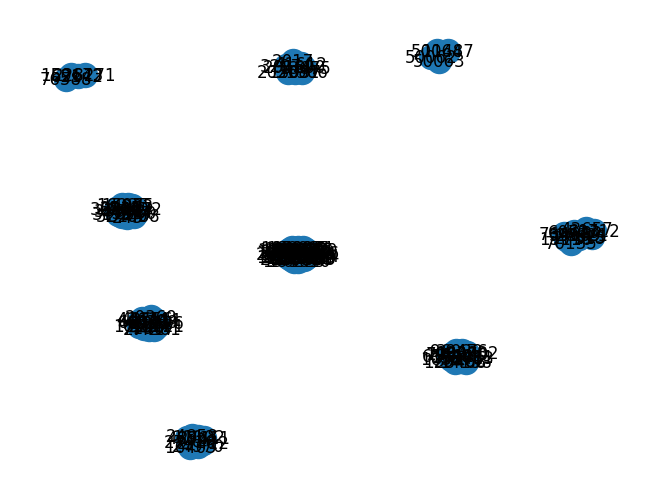

In [ ]:
nx.draw(g,with_labels = True, width=list(weights),edge_color=c)
plt.show()

In [ ]:
def get_node_color(strength):
  if strength>=5:
    return 'r'
  elif strength>=3:
    return 'g'
  else:
    return 'c'

In [ ]:
nodes_colors = map(get_node_color, visualisationData.values())
nc=list(nodes_colors )
nc

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

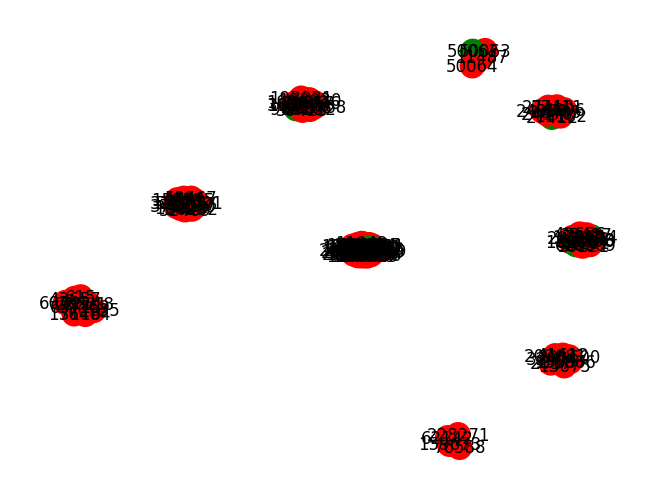

In [ ]:
nx.draw(g,with_labels = True, width=list(weights),edge_color=c, node_color=nc)
plt.show()